# Lab 3: Analyzing Data

In [2]:
import numpy as np
import ugradio
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import astropy
from itertools import chain
from scipy import signal
import scipy

In [4]:
plt.rc('font',**{'family':'serif','serif':['cmr10'], 'size':12})
plt.rc('text', usetex=True)

In [100]:
def PS(volts, times):
    """Takes in an array and outputs a discrete Fourier transform."""
    freq,fx = ugradio.dft.dft(volts, t=times)
    power = np.abs(fx)**2
    return freq, power

## The Sun

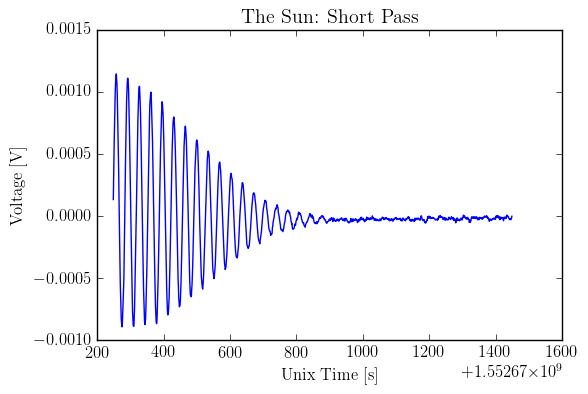

In [117]:
sun = np.load('sun_mar14.npz')
sun_times = sun['unitimes']
sun_volts = sun['volts']

plt.plot(sun_times, sun_volts, '-')
plt.xlabel('Unix Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Sun: Short Pass')
plt.show()

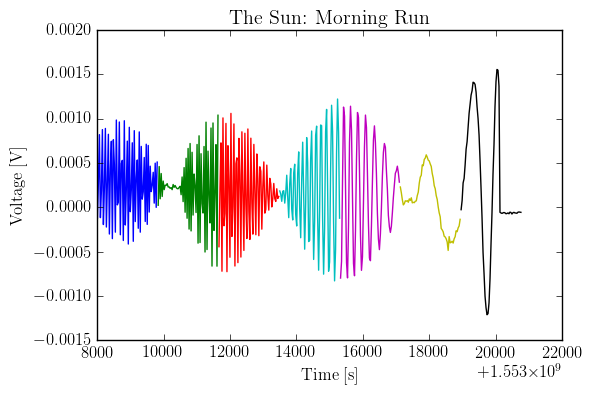

In [119]:
sun2 = np.load('sun_mar19.npz')
sun2_times = sun2['unitimes']
sun2_volts = sun2['volts']

for i in range(len(sun2_times)):
    plt.plot(sun2_times[i], sun2_volts[i], label=i*0.5+8)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Sun: Morning Run')
    
#plt.legend()
plt.show()    

In [2]:
sun3 = np.load('sun_mar29.npz')
sun3_times = sun3['unitimes']
sun3_volts = sun3['volts']

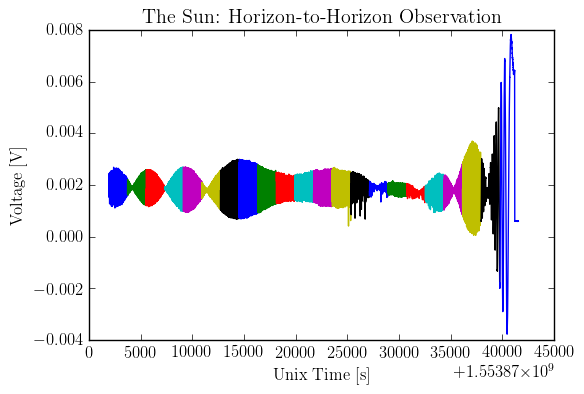

In [123]:
for i in range(len(sun3_times)):
    plt.plot(sun3_times[i], sun3_volts[i])
    plt.xlabel('Unix Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Sun: Horizon-to-Horizon Observation')
    
plt.show()    

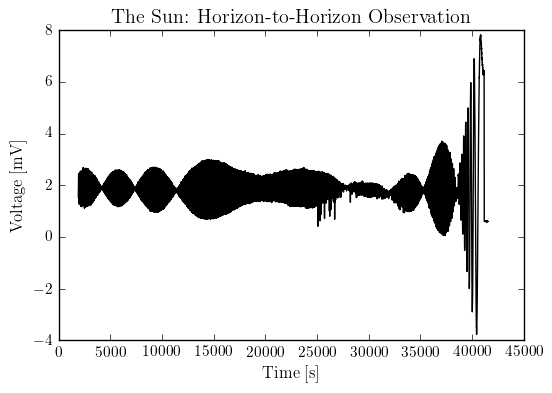

In [19]:
for i in range(len(sun3_times)):
    plt.plot(sun3_times[i]-1.55387e9, sun3_volts[i]*1000, 'k')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.title('The Sun: Horizon-to-Horizon Observation')
    
plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()    

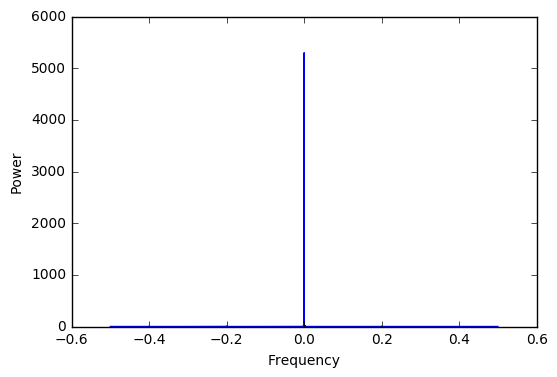

In [5]:
sun3_flat_volts = np.array(list(chain.from_iterable(sun3_volts)))
sun3_flat_times = np.array(list(chain.from_iterable(sun3_times)))


freq, power = PS(sun3_flat_volts, sun3_flat_times)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

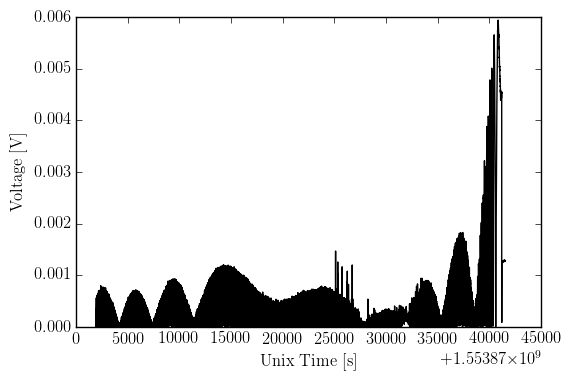

In [6]:
sun3_volts_flat = list(chain.from_iterable(sun3_volts))
sun3_times_flat = list(chain.from_iterable(sun3_times))

sun3_volts0 = sun3_volts_flat - np.average(sun3_volts_flat) # center voltages at zero

sun3_volts_abs = np.abs(sun3_volts0)
sun3_times_abs = np.abs(sun3_times_flat)

plt.plot(sun3_times_abs, sun3_volts_abs, 'k')
plt.xlabel('Unix Time [s]')
plt.ylabel('Voltage [V]')
plt.show()

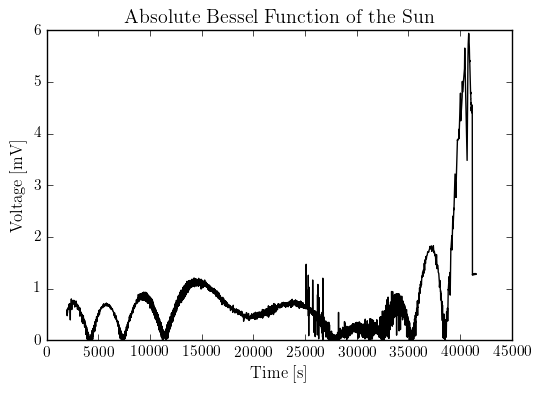

In [20]:
peak_indices, idk = signal.find_peaks(sun3_volts_abs)
sun3_times_peaks = sun3_times_abs[peak_indices]
sun3_volts_peaks = sun3_volts_abs[peak_indices]

plt.plot(sun3_times_peaks-1.55387e9, sun3_volts_peaks*1000, 'k')
plt.title('Absolute Bessel Function of the Sun')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')
plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()

In [133]:
# local minima between times:
# 1000-6000
# 6000-9000
# 9000-15000
# 15000-24000
# 24000-30000
# 30000-33000
# 33000-37000
# 37000-45000

sun3_times_mod = sun3_times_peaks-1.55387e9
print "Time Range    : Index Range"
print "0 - 6000      : 0 -", np.max(np.where(sun3_times_mod < 6000))
print "6000 - 9000   :", np.max(np.where(sun3_times_mod < 6000)), "-", np.max(np.where(sun3_times_mod < 9000))
print "9000 - 15000  :", np.max(np.where(sun3_times_mod < 9000)), "-", np.max(np.where(sun3_times_mod < 15000))
print "15000 - 24000 :", np.max(np.where(sun3_times_mod < 15000)), "-", np.max(np.where(sun3_times_mod < 24000))
print "24000 - 30000 :", np.max(np.where(sun3_times_mod < 24000)), "-", np.max(np.where(sun3_times_mod < 30000))
print "30000 - 33000 :", np.max(np.where(sun3_times_mod < 30000)), "-", np.max(np.where(sun3_times_mod < 33000))
print "33000 - 37000 :", np.max(np.where(sun3_times_mod < 33000)), "-", np.max(np.where(sun3_times_mod < 37000))
print "37000 - 45000 :", np.max(np.where(sun3_times_mod < 37000)), "-", np.max(np.where(sun3_times_mod < 45000))

Time Range    : Index Range
0 - 6000      : 0 - 382
6000 - 9000   : 382 - 668
9000 - 15000  : 668 - 1160
15000 - 24000 : 1160 - 1850
24000 - 30000 : 1850 - 2590
30000 - 33000 : 2590 - 3062
33000 - 37000 : 3062 - 3419
37000 - 45000 : 3419 - 3836


In [134]:
# locate minima within each range

print "Indices of Local Minima:"
print np.argmin(sun3_volts_peaks[0:382])
print np.argmin(sun3_volts_peaks[382:668]) + 382
print np.argmin(sun3_volts_peaks[668:1160]) + 668
print np.argmin(sun3_volts_peaks[1160:1850]) + 1160
print np.argmin(sun3_volts_peaks[1850:2590]) + 1850
print np.argmin(sun3_volts_peaks[2590:3062]) + 2590
print np.argmin(sun3_volts_peaks[3062:3419]) + 3062
print np.argmin(sun3_volts_peaks[3419:3836]) + 3419

Indices of Local Minima:
197
526
840
1467
2364
2995
3310
3516


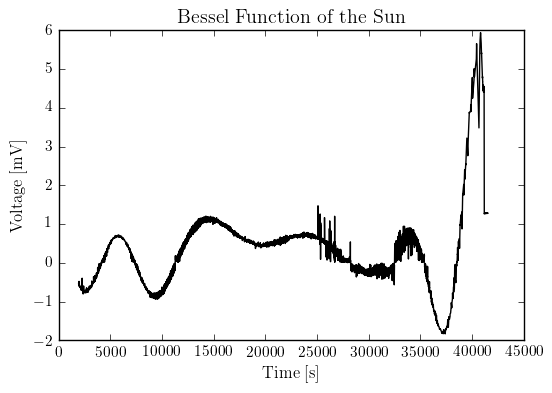

In [21]:
plt.plot(sun3_times_peaks[0:197]-1.55387e9, -sun3_volts_peaks[0:197]*1000, 'k')
plt.plot(sun3_times_peaks[197:526]-1.55387e9, +sun3_volts_peaks[197:526]*1000, 'k')
plt.plot(sun3_times_peaks[526:840]-1.55387e9, -sun3_volts_peaks[526:840]*1000, 'k')
plt.plot(sun3_times_peaks[840:2364]-1.55387e9, +sun3_volts_peaks[840:2364]*1000, 'k')
plt.plot(sun3_times_peaks[2364:2995]-1.55387e9, -sun3_volts_peaks[2364:2995]*1000, 'k')
plt.plot(sun3_times_peaks[2995:3310]-1.55387e9, +sun3_volts_peaks[2995:3310]*1000, 'k')
plt.plot(sun3_times_peaks[3310:3516]-1.55387e9, -sun3_volts_peaks[3310:3516]*1000, 'k')
plt.plot(sun3_times_peaks[3516:]-1.55387e9, +sun3_volts_peaks[3516:]*1000, 'k')
plt.title('Bessel Function of the Sun')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')
plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()

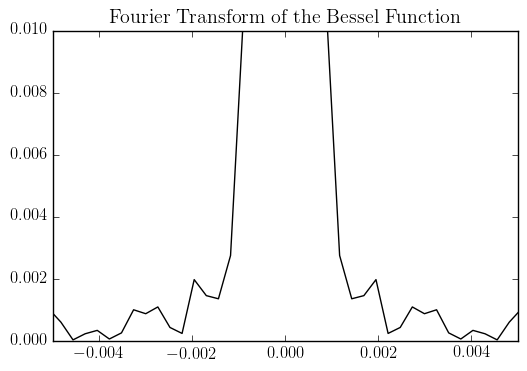

In [22]:
bessel_sun = [-sun3_volts_peaks[0:197], +sun3_volts_peaks[197:526], -sun3_volts_peaks[526:840], +sun3_volts_peaks[840:2364], -sun3_volts_peaks[2364:2995], +sun3_volts_peaks[2995:3310], -sun3_volts_peaks[3310:3516], +sun3_volts_peaks[3516:]]
bessel_sun_flat = list(chain.from_iterable(bessel_sun))

freq, fx = ugradio.dft.dft(bessel_sun_flat, sun3_times_peaks)
power = np.abs(fx)**2
plt.plot(freq, power, 'k-')
plt.xlim(-0.005, 0.005)
plt.ylim(0, 0.01)
plt.title('Fourier Transform of the Bessel Function')
plt.show()

## The Moon

In [11]:
moon = np.load('moon_mar17.npz')
moon_times = moon['unitimes']
moon_volts = moon['volts']

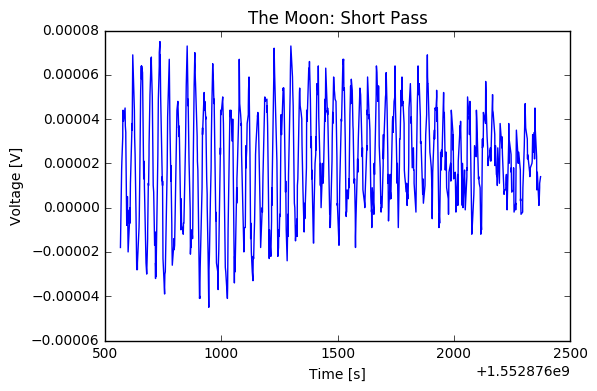

In [12]:
plt.plot(moon_times[0], moon_volts[0])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Moon: Short Pass')
plt.show()

In [14]:
moon2 = np.load('moon_mar18.npz')
moon2_times = moon2['unitimes']
moon2_volts = moon2['volts']

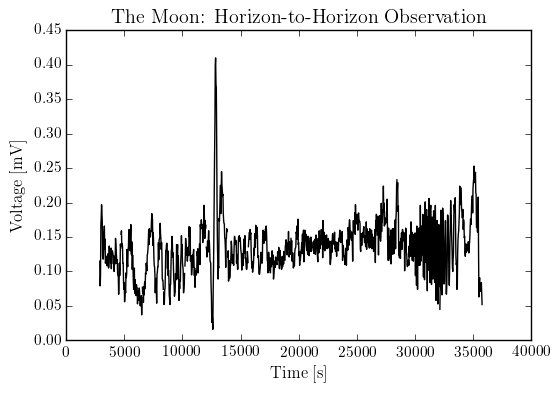

In [18]:
for i in range(len(moon2_times)):
    plt.plot(moon2_times[i]-1.552965e9, moon2_volts[i]*1000, 'k')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.title('The Moon: Horizon-to-Horizon Observation')
    
plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()    

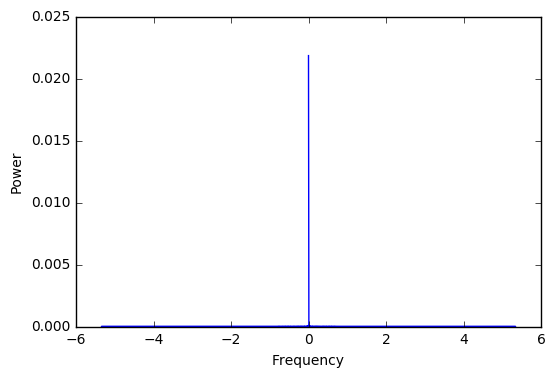

In [96]:
moon2_flat = list(chain.from_iterable(moon2_volts))

voltage = np.fft.fft(moon2_flat)
power = np.abs(voltage)**2
freq = np.fft.fftfreq(len(moon2_flat), 1/10.7)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

In [13]:
moon3 = np.load('moon_apr8.npz')
moon3_times = moon3['unitimes']
moon3_volts = moon3['volts']

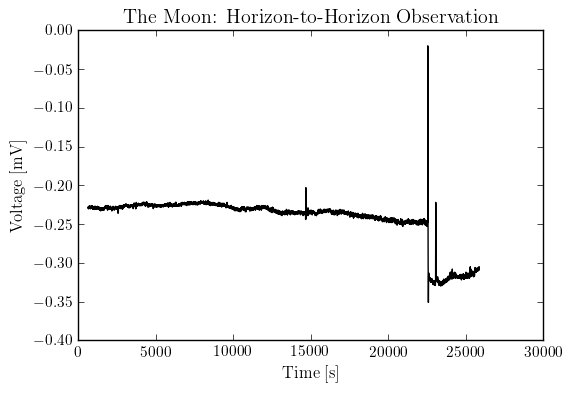

In [14]:
for i in range(len(moon3_times)):
    plt.plot(moon3_times[i]-1.554748e9, moon3_volts[i]*1000, 'k')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.title('The Moon: Horizon-to-Horizon Observation')
    
plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()    

## Cygnus

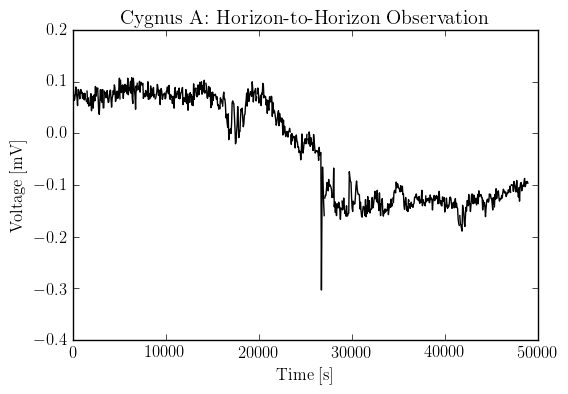

In [23]:
cygnus = np.load('cygnus_mar17.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

for i in range(len(cygnus_times)):
    plt.plot(cygnus_times[i]-1.5529e9, cygnus_volts[i]*1000, 'k', label=i*0.5+2)
    plt.xlabel('Time [s]')
    plt.xlim(0, 50000)
    plt.ylabel('Voltage [mV]')
    plt.title('Cygnus A: Horizon-to-Horizon Observation')
    
plt.show()    

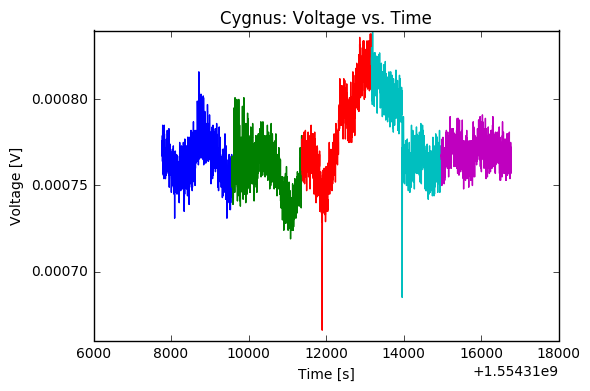

In [2]:
# April 3, ~12:00-1:30 pm

cygnus = np.load('cygnus_apr3.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

for i in range(len(cygnus_times)):
    plt.plot(cygnus_times[i], cygnus_volts[i], '-')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('Cygnus: Voltage vs. Time')
    
plt.show()    

## Crab Nebula

In [24]:
# April 5, 16:18:19.9 - April 6, 00:18:39.9

crab = np.load('crab_apr5.npz')
crab_times = crab['unitimes'][0:16]
crab_volts = crab['volts'][0:16]

In [84]:
np.shape(crab_times)

(16, 1801)

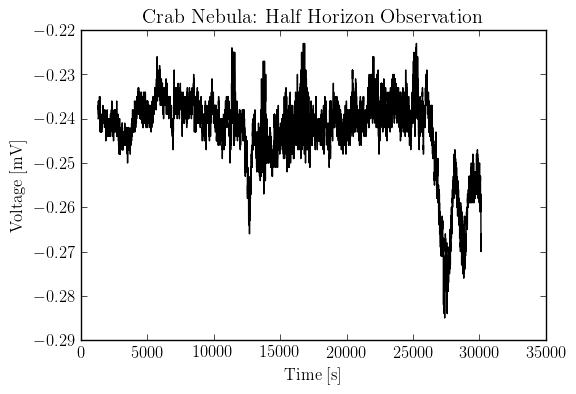

In [48]:
for i in range(len(crab_times)):
    plt.plot(crab_times[i]-1.554505e9, crab_volts[i]*1000, 'k')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.title('Crab Nebula: Half Horizon Observation')
    
plt.show()    

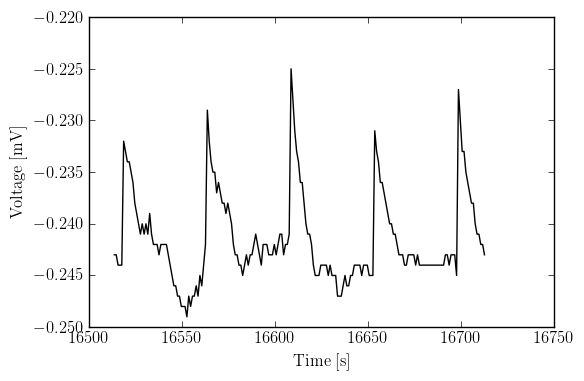

In [61]:
plt.plot(crab_times[8][800:1000]-1.554505e9, crab_volts[8][800:1000]*1000, 'k')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')
#plt.title('Crab Nebula: Half Horizon Observation')
plt.show()    

In [68]:
np.where(crab_volts[8]*1000 > -0.237)

(array([  39,   40,   41,  400,  445,  446,  490,  580,  581,  582,  583,
         584,  585,  625,  670,  671,  715,  716,  760,  761,  762,  805,
         806,  807,  808,  809,  810,  850,  851,  852,  853,  854,  856,
         895,  896,  897,  898,  899,  900,  901,  940,  941,  942,  943,
         944,  985,  986,  987,  988,  989,  990, 1030, 1031, 1032, 1033,
        1034, 1035, 1075, 1076, 1077, 1078, 1120, 1121, 1122, 1123, 1124,
        1125, 1126, 1165, 1166, 1167, 1168, 1169, 1210, 1211, 1212, 1213,
        1214, 1215, 1255, 1256, 1257, 1300, 1301, 1302, 1345, 1346, 1390,
        1435, 1615]),)

In [69]:
# peaks between indices 800-1000

peaks = [805, 806,  807,  808,  809,  810,  850,  851,  852,  853,  854,  856, 895,  896,  897,  898,  899,  900,  901,  940,  941,  942,  943, 944,  985,  986,  987,  988,  989,  990]

# note: 805, 850, 895, 940, 985

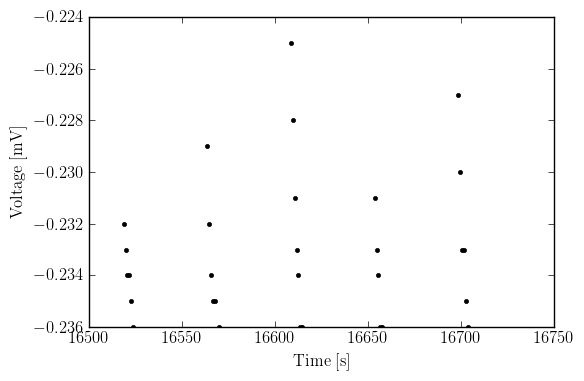

In [70]:
plt.plot(crab_times[8][peaks]-1.554505e9, crab_volts[8][peaks]*1000, 'k.')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')
#plt.title('Crab Nebula: Half Horizon Observation')
plt.show()    

In [71]:
print(crab_times[8][850]-crab_times[8][805])
print(crab_times[8][895]-crab_times[8][850])
print(crab_times[8][940]-crab_times[8][895])
print(crab_times[8][985]-crab_times[8][940])

45.00015997886658
45.00003504753113
45.00000596046448
44.99985599517822


In [75]:
avg_period = np.average([45.00015997886658, 45.00003504753113, 45.00000596046448, 44.99985599517822])
avg_freq = 1/avg_period
print 'Average Period:', avg_period
print 'Average Frequency:', avg_freq

Average Period: 45.0000142455101
Average Frequency: 0.022222215187404647


## Local Fringe Frequencies

In [49]:
def lff_sun(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [22]:
def lff_moon(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.moonpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [23]:
def lff_cyg(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra = np.deg2rad(299.86815417)
    dec = np.deg2rad(40.73391667)
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [56]:
def lff_crab(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra = np.deg2rad(83.916)
    dec = np.deg2rad(22.025)
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [11]:
b_x = 1500 # east-west baseline in centimeters (~50 ft)

### The Sun

In [50]:
sun_lff = []

for i in range(len(sun3_times)-1):
    jd = ugradio.timing.julian_date(sun3_times[i][0])
    lff = lff_sun(jd, 1500, 0)
    sun_lff.append(lff)
    
print "Range of expected fringe frequencies for the Sun horizon-to-horizon observation:", sun_lff

Range of expected fringe frequencies for the Sun horizon-to-horizon observation: [0.008830032801511805, 0.013713223474268288, 0.018361019022453767, 0.022694307254303943, 0.026638623903359637, 0.030126392747952584, 0.03309770586798473, 0.03550175369289815, 0.03729733378057003, 0.03845367900662069, 0.03895096454387068, 0.03878067072868786, 0.03794567699544548, 0.036460406423021605, 0.03435025702357529, 0.031650152669252904, 0.028408601167534586, 0.024680160107860036, 0.020528743217889854, 0.016025475283146864, 0.011247657140532663]


### Cygnus

In [24]:
jd2 = 2458568.87500
jd4 = 2458568.95833
jd6 = 2458569.04167
jd8 = 2458569.12500
jd10 = 2458569.20833
jd12 = 2458569.29167
jd14 = 2458569.37500

print "Range of expected fringe frequencies for Cygnus horizon-to-horizon observation:"
print(lff_cyg(jd2, 1500, 0)) # starting point - 2:00 am PDT, 3/26/19
print(lff_cyg(jd4, 1500, 0))
print(lff_cyg(jd6, 1500, 0))
print(lff_cyg(jd8, 1500, 0))
print(lff_cyg(jd10, 1500, 0))
print(lff_cyg(jd12, 1500, 0))
print(lff_cyg(jd14, 1500, 0)) # ending point - 2:00 pm PDT, 3/26/19

Range of expected fringe frequencies for Cygnus horizon-to-horizon observation:
-0.006958722936708099
0.008389792015953267
0.021479684999796446
0.028781947767882714
0.028331404688694092
0.02024805676116211
0.006711157962825606


In [26]:
c = 299792458  # speed of light in meters/second
f = 10.7e9     # sampling frequency of detectors in Hz
wl = c/f*100   # wavelength in centimeters
dec = np.deg2rad(40.73391667)
lff = ((1500/wl)*np.cos(dec)) * (2*np.pi/86164)
period = 1/lff
print"Expected local fringe frequency at meridian:", lff, "Hz"
print"Expected period at meridian:", period, "seconds"

Expected local fringe frequency at meridian: 0.029582389918027092 Hz
Expected period at meridian: 33.80389491082376 seconds


In [4]:
cygnus = np.load('cygnus_mar17.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

In [ ]:
Q_ew = (b_x/wl)*np.cos(dec)

Q_ns = (b_y/wl)*np.sin(L)*np.cos(dec)

ra = np.deg2rad(299.86815417)
lst = ugradio.timing.lst(jd)
ha = ra - lst  # hour angle in radians

lff = Q_ew * np.cos(ha) - Q_ns * np.sin(ha)

### Crab

In [60]:
crab_lff = []

for i in range(len(crab_times)-1):
    jd = ugradio.timing.julian_date(crab_times[i][0])
    lff = lff_crab(jd, 1500, 0)
    crab_lff.append(lff)
    
print "Range of expected fringe frequencies for the Crab Nebula half horizon observation:", crab_lff

print "Range of expected periods for the Crab Nebula half horizon observation:", 1/np.array(crab_lff)

Range of expected fringe frequencies for the Crab Nebula half horizon observation: [0.03341038749675963, 0.034944408940567585, 0.035876551785841225, 0.036190746358838406, 0.03588157787268561, 0.034954363138073014, 0.033425059021369115, 0.03132000152200932, 0.028675438837952247, 0.025536935084244664, 0.02195854368522507, 0.018001866052627578, 0.013735090171818768, 0.009231690918434912, 0.004569235010325325]
Range of expected periods for the Crab Nebula half horizon observation: [ 29.93081119  28.61688122  27.87335879  27.63137267  27.86945445
  28.60873179  29.91767342  31.92847865  34.87304957  39.15896707
  45.54036071  55.54979673  72.80622024 108.32251738 218.85501572]


## Measuring the Radius of a Circular Source

### The Sun

In [16]:
R = 695510000. # meters
d = 149597870700. # meters
theta = np.arctan(R/d)
print "Expected angular radius of the Sun:", theta, "radians"
print "Expected angular diameter of the Sun:", theta*2, "radians"

Expected angular radius of the Sun: 0.0046491636923241255 radians
Expected angular diameter of the Sun: 0.009298327384648251 radians


In [30]:
# times of local minima
mini = [197, 526, 840, 1467, 2364, 2995, 3310, 3516]
sun3_times_peaks[mini]

array([1.55387415e+09, 1.55387739e+09, 1.55388129e+09, 1.55388906e+09,
       1.55389826e+09, 1.55390251e+09, 1.55390542e+09, 1.55390853e+09])

In [10]:
scipy.special.jn_zeros(1, 8)

array([ 3.83170597,  7.01558667, 10.17346814, 13.32369194, 16.47063005,
       19.61585851, 22.76008438, 25.90367209])

In [31]:
# do not remember what x is supposed to be

x = scipy.special.jn_zeros(1, 8)
jd = ugradio.timing.julian_date(sun3_times_peaks[mini])

theta_sun = []

for i in range(len(jd)-1):
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd[i]))
    lst = ugradio.timing.lst(jd[i])
    ha = ra - lst  # hour angle in radians

    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    b_x = 1475

    u = b_x/wl * np.cos(ha)
    theta = x[i] / (2*np.pi*u)
    theta_sun.append(theta)
    
print(theta_sun)

[0.0030391924828959914, 0.003615226933064462, 0.0038948361062247877, 0.004046401954672704, 0.005930166946212001, 0.009343507049871011, 0.015014336367560227]


In [43]:
theta_sun = [0.0030391924828959914, 0.003615226933064462, 0.0038948361062247877, 0.004046401954672704, 0.005930166946212001, 0.009343507049871011, 0.015014336367560227]

print "Average angular radius of the Sun:", np.average(theta_sun), "radians"

sigma = np.std(theta_sun)/np.sqrt(2)
chisq = np.sum(np.abs(theta_sun-theta)**2/sigma**2)
chi = chisq/len(theta_sun)
print "Chi-squared reduced:", chi

Average angular radius of the Sun: 0.006411952548643026 radians
Chi-squared reduced: 11.09134988223587


In [45]:
# removed outlier

theta_sun_mod = [0.0030391924828959914, 0.003615226933064462, 0.0038948361062247877, 0.004046401954672704, 0.005930166946212001, 0.009343507049871011]

print "Average angular radius of the Sun with outlier removed:", np.average(theta_sun_mod), "radians"

sigma = np.std(theta_sun_mod)/np.sqrt(2)
chisq = np.sum(np.abs(theta_sun_mod-theta)**2/sigma**2)
chi = chisq/len(theta_sun_mod)
print "Chi-squared reduced:", chi

Average angular radius of the Sun with outlier removed: 0.004978221912156826 radians
Chi-squared reduced: 45.758751722651645


In [46]:
print "Variance of angular radius:", np.var(theta_sun)
print "Variance of angular radius without outlier:", np.var(theta_sun_mod)

Variance of angular radius: 1.6279432279372167e-05
Variance of angular radius without outlier: 4.603586226606995e-06


### The Moon

## Deriving Declination

In [80]:
def lff_crab_dec(unixtimes, dec):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    jd = ugradio.timing.julian_date(unixtimes)
    ra = np.deg2rad(83.916)
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    dec_rad = np.deg2rad(dec)
    
    lff = (((1475/wl)*np.cos(dec_rad))*np.cos(ha)) * (2*np.pi/86164)
    return lff

In [78]:
def chisq(data_obs, data_exp):
    data_obs = np.asarray(data_obs)
    data_exp = np.asarray(data_exp)
    sigmasq = np.var(data_exp)
    chisq = np.sum(np.abs(data_exp-data_obs)**2/sigmasq)
    return chisq

In [77]:
np.average(crab_times[8][800:1000])

1554521613.102491

In [97]:
dec = np.linspace(22, 50, num=28001)

delta_dec = [[], []]

for i in range(len(dec)-1):
    
    lff_obs = 0.022222215187404647
    lff_exp = lff_crab_dec(1554521613.102491, dec[i])
        
    diff = np.abs(lff_obs-lff_exp)
    delta_dec[0].append(diff)
    delta_dec[1].append(dec[i])

In [99]:
print "Lowest Delta:", delta_dec[0][np.argmin(delta_dec[0])]
print "Declination:", delta_dec[1][np.argmin(delta_dec[0])], "degrees"

Lowest Delta: 1.475071883978718e-07
Declination: 39.542 degrees
